# Transforming a Job Advertisement into a Word Cloud

### 1. Introduction

Hi, there! In this notebook, I will get a job description from Playstation, which can be found [here](https://boards.greenhouse.io/sonyinteractiveentertainmentglobal/jobs/4331039004?gh_src=c81250474us&s=LinkedIn&source=LinkedIn). After saving the text as a `.txt` file, I will read it and use the `wordcloud` module to store the text as a word cloud object. Then, I will generate a word cloud object. We will also see how to use masked images to provide an interesting shape to our visualization. 

### 2. Import modules that we will be using

In [61]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from wordcloud import WordCloud, STOPWORDS

### 3. Read files

In [3]:
CURRENT_DIR = Path.cwd()
DATA_DIR = CURRENT_DIR / "data"

In [4]:
# Open the file and read it into a variable ps_offer.
job_description = open( DATA_DIR /'job_description.txt', 'r').read()

print("File downloaded and saved!")

File downloaded and saved!


### 4. Create word cloud

`STOPWORDS` provides a set of words that will be eliminated. Repeating terms such as "is", "it", and so on may impinge on our final result, as they appear often.
Ah, I should also warn you: when generating the word cloud, you might get a string-related error. That happens if the file is not stored as string, I suppose. Hence the `str()` to transform all text into string!

In [5]:
stopwords = set(STOPWORDS)

In [6]:
# Insantiate a word cloud object.
job_description_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
) 

# Generate the word cloud.
job_description_wc.generate(str(job_description))

Cool, we already have our word cloud object ready to be used! Let's use `matplotlib` features to provide a visual display.

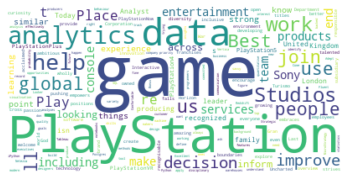

In [7]:
# Display the word cloud.
plt.imshow(job_description_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

We're getting there! Let's adjust width and height now.

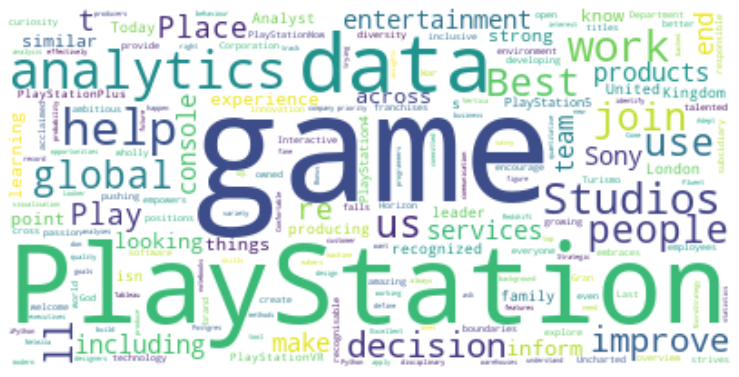

In [8]:
fig = plt.figure()
fig.set_figwidth(13) # Set width
fig.set_figheight(18) # Set height

# Display the word cloud.
plt.imshow(job_description_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Nice! Still, there are a few words that are not as relevant to our word cloud - obviously, PlayStation would appear many times in the job offer, right? Let's remove them. Since STOPWORDS is already a list, I'll store other unwanted words in a list and add them to STOPWORDS.

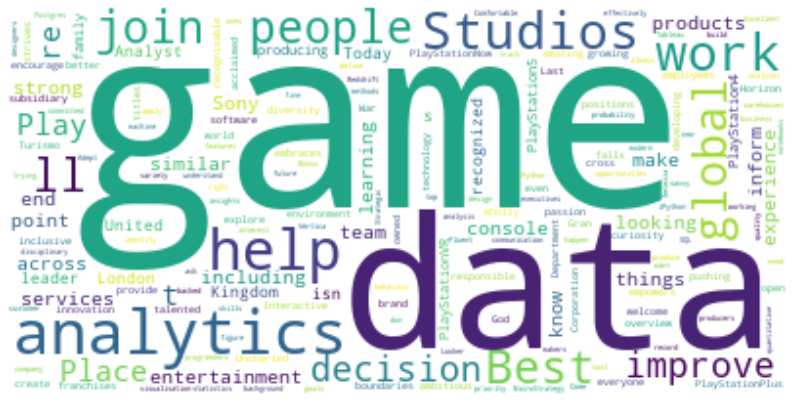

In [15]:
stopwords = ['PlayStation', 'use', 'us', 'Studio'] + list(STOPWORDS) # Add the words that we don't want to stopwords

job_description_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
) 

# Re-generate the word cloud.
job_description_wc.generate(str(job_description))

# Display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(job_description_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### 5. Add masked image to word cloud

All right! Now, let's provide a shape to our word cloud. I found a nice joystick logo online (an honest google work did the job) and saved it in the same folder as my data. Let's now use `numpy` to open the image and save it as `ps_mask`. Then, let's open it with `Matplotlib` once again to see if all went well.

In [30]:
# Save the image to ps_mask.
ps_mask = np.array(Image.open(DATA_DIR /'joh.jpg'))

print("Image downloaded and saved!")

Image downloaded and saved!


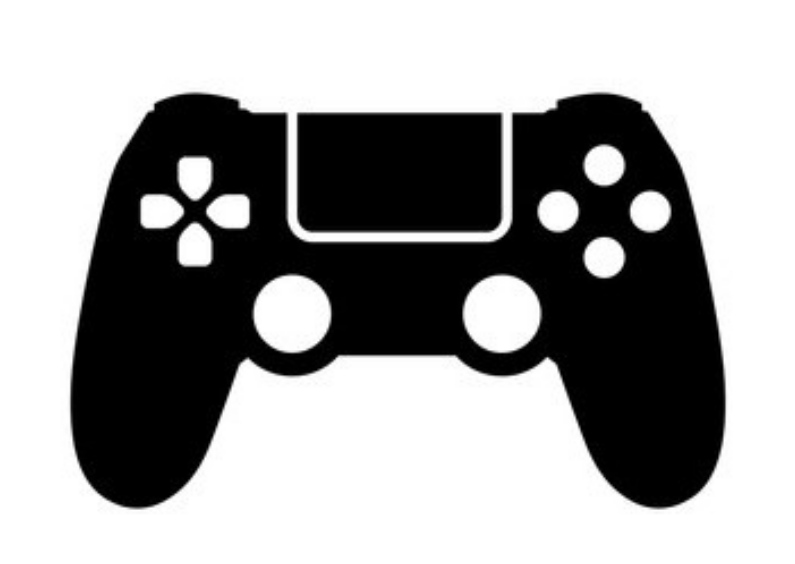

In [31]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(ps_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

...and it did indeed! We just have to create another word cloud object again and display it to see the final result! I suggest you to check [WordCloud documentation](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html) to learn more about all its features - there's a lot you can do! I played around for some minutes and got a much more interesting result! 

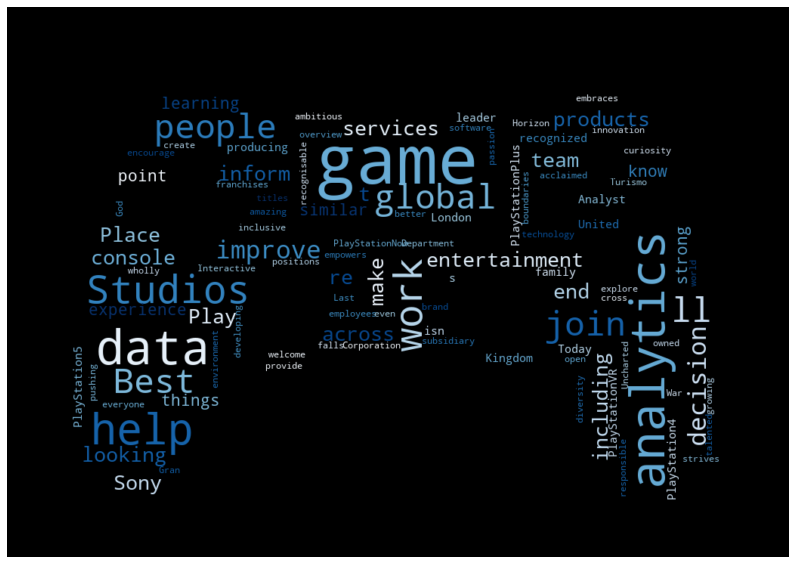

In [60]:
# Instantiate a word cloud object.
job_description_wc = WordCloud(
                            background_color='black',
                            contour_width=0.1,
                            contour_color='black',
                            scale=3,
                            relative_scaling=0.5,
                            colormap='Blues',
                            max_words=2000,
                            mask=ps_mask,
                            stopwords=stopwords)

# Generate the word cloud.
job_description_wc.generate(job_description)

# Display the word cloud.
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(job_description_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

And there it is! I really liked this colormap (check [Matplotlib colormap documentation for more info](https://matplotlib.org/stable/gallery/color/colormap_reference.html)), since it reminds me of the current PlayStation palette. Well, thank you for stopping by and feel free to mail me!